In [3]:
import pandas as pd

resultado = []

with open ('vendas_agricolas.csv', 'r', encoding='utf-8') as f:

    df = pd.read_csv(f)

print(df.head(5))

print(df.describe())

print('A menor quantidade vendida foi de 14. O produto foi Tomate, na região Oeste ')
print('A maior quantidade vendida foi de 494.')
print('A quantidade média vendia foi de 246,12')
print('Desvio padrão foi de 139.32')
print('No primeiro quartil tivemos 135,25 quantidades vendidas')
print('Na mediana temos 240 quantidades vendidas')
print('No terceiro quartil tivemos 362,75 quantidades vendidas')

print('Tendo sido a média próximo ao segundo quartil, ou seja, metade das vendas foram feitas aproximadamente até a metade do período, pode-se dizer que as vendas foram estáveis, sem uma alta ou queda significativa nas vendas')


df.describe()


media_qtd = df['quantidade_vendida'].mean()
std_qtd = df['quantidade_vendida'].std()

# Para preço unitário
media_preco = df['preco_unitario'].mean()
std_preco = df['preco_unitario'].std()

print(f"Média de quantidade vendida: {media_qtd:.2f}")
print(f"Desvio padrão da quantidade: {std_qtd:.2f}")
print(f"\nMédia de preço unitário: R$ {media_preco:.2f}")
print(f"Desvio padrão do preço: R$ {std_preco:.2f}")

   produto  quantidade_vendida  preco_unitario regiao  data_venda  \
0  Cenoura                  37            3.42  Leste  2023-12-20   
1   Alface                 144            3.20  Oeste  2023-11-18   
2   Tomate                 210            2.51    Sul  2023-10-15   
3   Alface                 337            2.97    Sul  2023-08-03   
4   Alface                 277            6.02  Oeste  2023-12-08   

  categoria_produto  
0        Hortaliças  
1            Frutas  
2            Frutas  
3        Hortaliças  
4            Frutas  
       quantidade_vendida  preco_unitario
count          100.000000      100.000000
mean           246.120000        5.804700
std            139.325741        2.496724
min             14.000000        1.160000
25%            135.250000        3.547500
50%            240.000000        5.655000
75%            362.750000        7.792500
max            494.000000        9.980000
A menor quantidade vendida foi de 14. O produto foi Tomate, na região Oeste

EXERCICIO 2


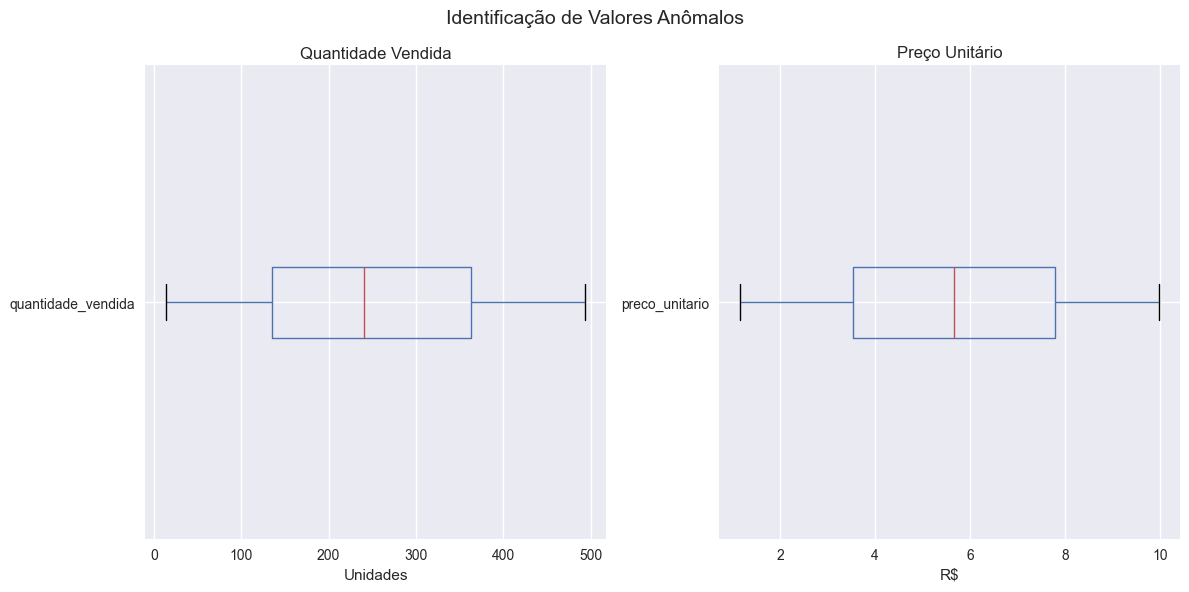

In [4]:

print("EXERCICIO 2")

import matplotlib.pyplot as plt

def plotar_boxplots(df):
    """
    Cria boxplots para identificar valores anômalos
    """
    if df is None:
        return

    # Configuração do estilo
    plt.style.use('seaborn')

    # Cria figura com 2 subplots (1 linha, 2 colunas)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Identificação de Valores Anômalos', fontsize=14)

    # Boxplot para quantidade vendida
    df.boxplot(column='quantidade_vendida', ax=ax1, vert=False)
    ax1.set_title('Quantidade Vendida')
    ax1.set_xlabel('Unidades')

    # Boxplot para preço unitário
    df.boxplot(column='preco_unitario', ax=ax2, vert=False)
    ax2.set_title('Preço Unitário')
    ax2.set_xlabel('R$')

    # Ajusta layout e mostra
    plt.tight_layout()
    plt.show()

plotar_boxplots(df)

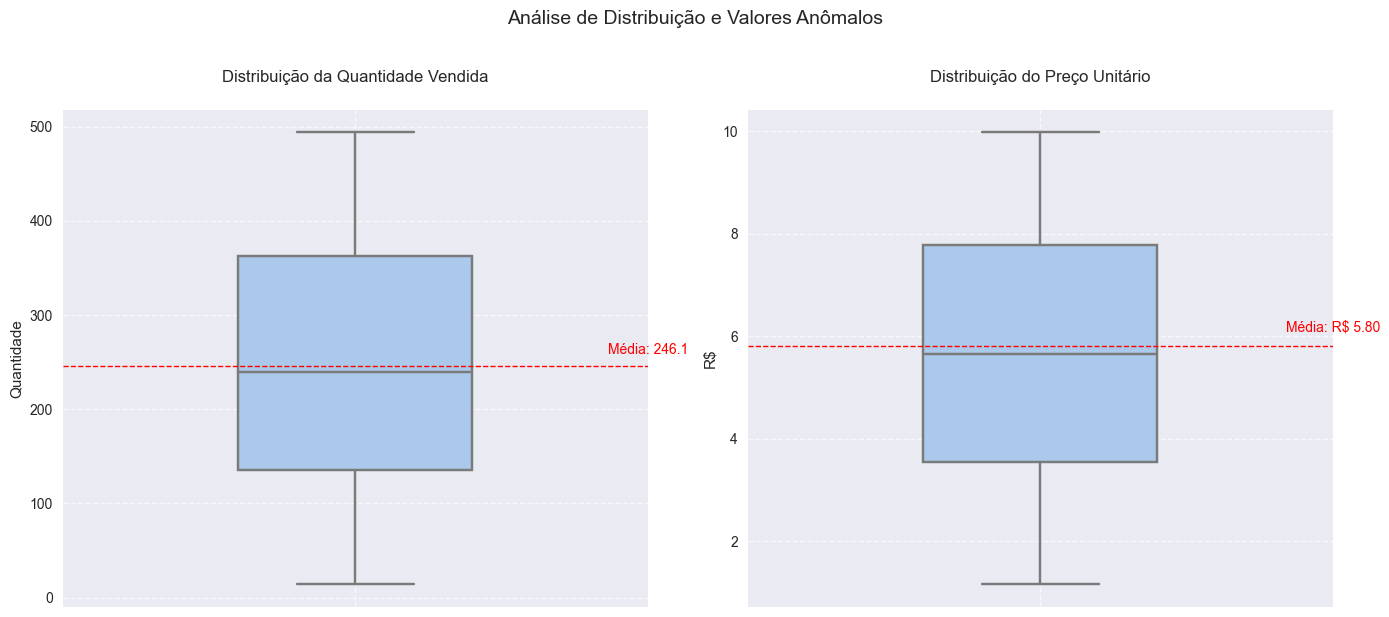


IDENTIFICAÇÃO DE OUTLIERS:

Outliers em Quantidade Vendida (0 registros):
Empty DataFrame
Columns: [produto, quantidade_vendida, regiao, data_venda]
Index: []

Outliers em Preço Unitário (0 registros):
Empty DataFrame
Columns: [produto, preco_unitario, regiao, data_venda]
Index: []


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def carregar_dados(nome_arquivo):
    """Carrega os dados do arquivo CSV"""
    try:
        df = pd.read_csv(nome_arquivo)
        df['data_venda'] = pd.to_datetime(df['data_venda'])
        df['valor_total'] = df['quantidade_vendida'] * df['preco_unitario']
        return df
    except Exception as e:
        print(f"Erro ao carregar dados: {e}")
        return None

def plotar_boxplots(df):
    """
    Cria boxplots para quantidade vendida e preço unitário
    """
    if df is None:
        return

    # Configuração do estilo
    plt.style.use('seaborn')
    sns.set_palette("pastel")

    # Criando figura com 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Boxplot para quantidade vendida
    sns.boxplot(y=df['quantidade_vendida'], ax=ax1, width=0.4)
    ax1.set_title('Distribuição da Quantidade Vendida', pad=20)
    ax1.set_ylabel('Quantidade')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Adicionando linha de média
    media_qtd = df['quantidade_vendida'].mean()
    ax1.axhline(media_qtd, color='red', linestyle='--', linewidth=1)
    ax1.text(0.5, media_qtd*1.05, f'Média: {media_qtd:.1f}',
             color='red', ha='center')

    # Boxplot para preço unitário
    sns.boxplot(y=df['preco_unitario'], ax=ax2, width=0.4)
    ax2.set_title('Distribuição do Preço Unitário', pad=20)
    ax2.set_ylabel('R$')
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Adicionando linha de média
    media_preco = df['preco_unitario'].mean()
    ax2.axhline(media_preco, color='red', linestyle='--', linewidth=1)
    ax2.text(0.5, media_preco*1.05, f'Média: R$ {media_preco:.2f}',
             color='red', ha='center')

    plt.suptitle('Análise de Distribuição e Valores Anômalos', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

def identificar_outliers(df):
    """Identifica e exibe os registros com valores anômalos"""
    print("\nIDENTIFICAÇÃO DE OUTLIERS:")

    # Para quantidade vendida
    q1_qtd = df['quantidade_vendida'].quantile(0.25)
    q3_qtd = df['quantidade_vendida'].quantile(0.75)
    iqr_qtd = q3_qtd - q1_qtd
    lim_inf_qtd = q1_qtd - 1.5 * iqr_qtd
    lim_sup_qtd = q3_qtd + 1.5 * iqr_qtd

    outliers_qtd = df[(df['quantidade_vendida'] < lim_inf_qtd) |
                     (df['quantidade_vendida'] > lim_sup_qtd)]

    print(f"\nOutliers em Quantidade Vendida ({len(outliers_qtd)} registros):")
    print(outliers_qtd[['produto', 'quantidade_vendida', 'regiao', 'data_venda']]
          .sort_values('quantidade_vendida', ascending=False))

    # Para preço unitário
    q1_preco = df['preco_unitario'].quantile(0.25)
    q3_preco = df['preco_unitario'].quantile(0.75)
    iqr_preco = q3_preco - q1_preco
    lim_inf_preco = q1_preco - 1.5 * iqr_preco
    lim_sup_preco = q3_preco + 1.5 * iqr_preco

    outliers_preco = df[(df['preco_unitario'] < lim_inf_preco) |
                       (df['preco_unitario'] > lim_sup_preco)]

    print(f"\nOutliers em Preço Unitário ({len(outliers_preco)} registros):")
    print(outliers_preco[['produto', 'preco_unitario', 'regiao', 'data_venda']]
          .sort_values('preco_unitario', ascending=False))

def main():
    # Carregar dados (substitua pelo seu caminho real)
    df = carregar_dados('vendas_agricolas.csv')

    if df is not None:
        # Plotar os boxplots
        plotar_boxplots(df)

        # Identificar outliers
        identificar_outliers(df)

if __name__ == "__main__":
    main()

In [7]:
def plotar_boxplots_por_categoria(df):
    """Boxplots separados por categoria de produto"""
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='categoria_produto', y='quantidade_vendida', data=df)
    plt.title('Quantidade Vendida por Categoria')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='categoria_produto', y='preco_unitario', data=df)
    plt.title('Preço Unitário por Categoria')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



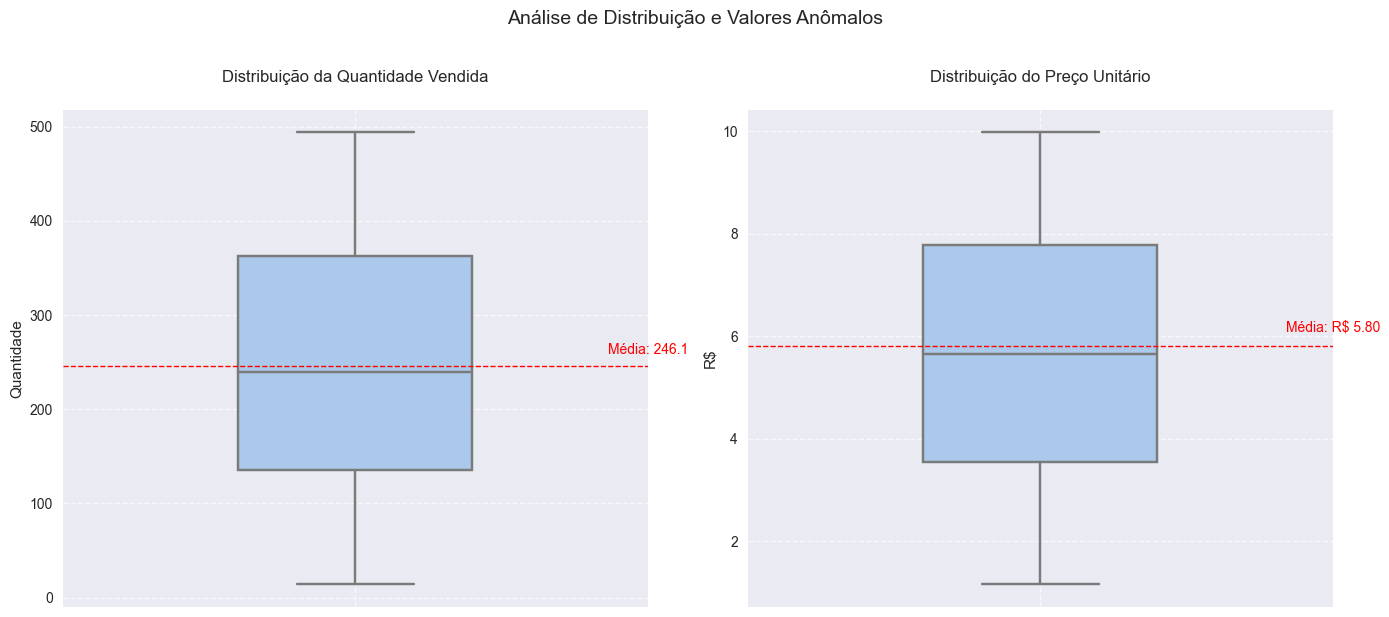

In [8]:
plotar_boxplots(df)

EXERCICIO 3

=== ANÁLISE REGIONAL ===
        quantidade_vendida  valor_total  preco_unitario
regiao                                                 
Norte           262.545455  1631.760909        6.178636
Sul             259.269231  1421.015385        5.437308
Oeste           235.172414  1328.745172        5.761379
Leste           229.347826  1344.255652        5.916957

A região com maior volume médio de vendas é 'Norte' com média de 262.5 unidades por venda.


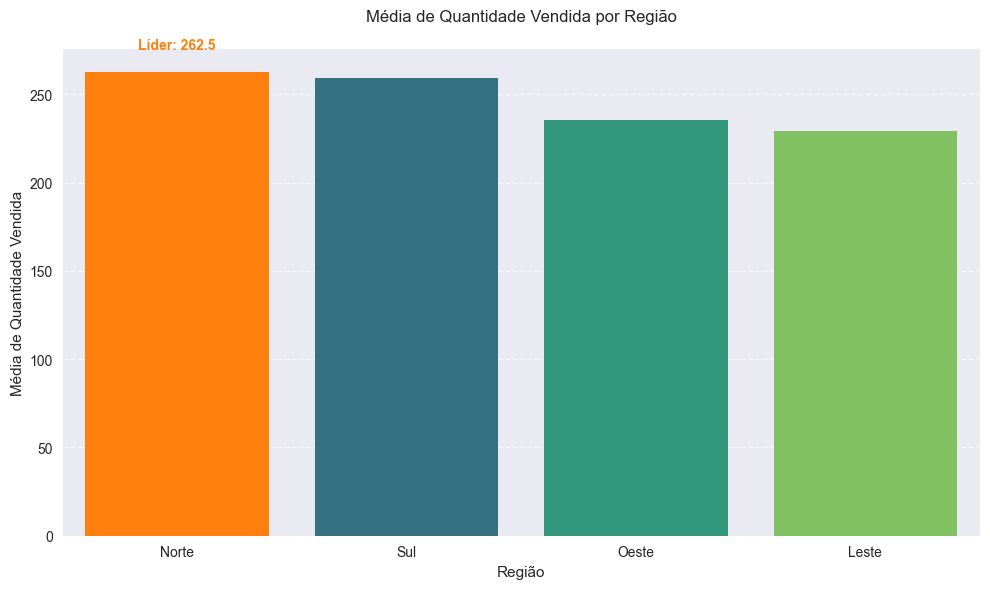


INTERPRETAÇÃO:
As diferenças regionais podem ser explicadas por:
- Densidade populacional e poder de compra
- Cultura agrícola local e preferências de consumo
- Eficiência da distribuição e logística regional
- Presença de grandes compradores institucionais

=== ANÁLISE POR CATEGORIA ===
                   preco_unitario  quantidade_vendida  valor_total
categoria_produto                                                 
Frutas                   6.264800          261.440000     41977.34
Grãos                    5.729070          243.930233     59760.05
Hortaliças               5.546875          237.093750     40559.24

Categoria mais cara: 'Frutas' (R$ 6.26/unidade)
Categoria mais barata: 'Hortaliças' (R$ 5.55/unidade)


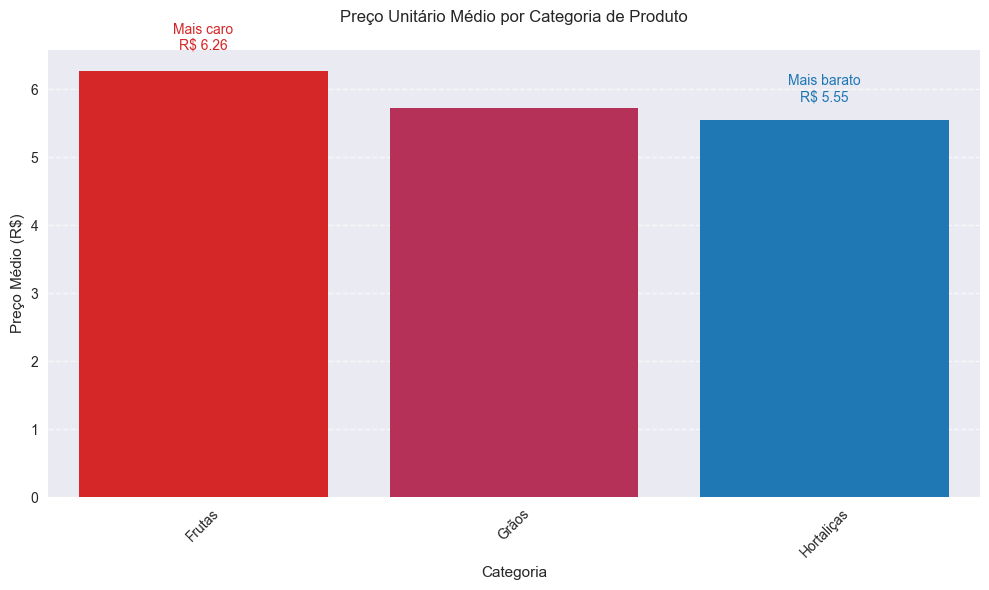


INTERPRETAÇÃO:
As diferenças de preço entre categorias podem refletir:
- Custos de produção (insumos, mão-de-obra, tecnologia)
- Perecibilidade e custos de armazenamento
- Sazonalidade e oferta disponível
- Valor agregado e demanda do mercado


In [11]:
print("EXERCICIO 3")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def carregar_dados(nome_arquivo):
    """Carrega e prepara os dados"""
    try:
        df = pd.read_csv(nome_arquivo)
        df['data_venda'] = pd.to_datetime(df['data_venda'])
        df['valor_total'] = df['quantidade_vendida'] * df['preco_unitario']
        return df
    except Exception as e:
        print(f"Erro ao carregar dados: {e}")
        return None

def analise_regional(df):
    """Análise comparativa por região"""
    if df is None:
        return

    # Agrupamento por região
    analise_regiao = df.groupby('regiao').agg({
        'quantidade_vendida': 'mean',
        'valor_total': 'mean',
        'preco_unitario': 'mean'
    }).sort_values('quantidade_vendida', ascending=False)

    # Região com maior volume médio
    regiao_top = analise_regiao.index[0]
    media_top = analise_regiao.iloc[0]['quantidade_vendida']

    print("\n=== ANÁLISE REGIONAL ===")
    print(analise_regiao)
    print(f"\nA região com maior volume médio de vendas é '{regiao_top}' "
          f"com média de {media_top:.1f} unidades por venda.")

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=analise_regiao.index, y='quantidade_vendida',
                data=analise_regiao, palette='viridis')

    plt.title('Média de Quantidade Vendida por Região', pad=20)
    plt.xlabel('Região')
    plt.ylabel('Média de Quantidade Vendida')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Destacar a região líder
    plt.gca().patches[0].set_facecolor('#ff7f0e')
    plt.text(0, media_top*1.05, f'Líder: {media_top:.1f}',
             ha='center', color='#ff7f0e', weight='bold')

    plt.tight_layout()
    plt.show()

    # Interpretação
    print("\nINTERPRETAÇÃO:")
    print("As diferenças regionais podem ser explicadas por:")
    print("- Densidade populacional e poder de compra")
    print("- Cultura agrícola local e preferências de consumo")
    print("- Eficiência da distribuição e logística regional")
    print("- Presença de grandes compradores institucionais")

def analise_categorias(df):
    """Análise comparativa por categoria de produto"""
    if df is None:
        return

    # Agrupamento por categoria
    analise_cat = df.groupby('categoria_produto').agg({
        'preco_unitario': 'mean',
        'quantidade_vendida': 'mean',
        'valor_total': 'sum'
    }).sort_values('preco_unitario', ascending=False)

    # Categorias extremas
    cat_mais_cara = analise_cat.index[0]
    preco_mais_caro = analise_cat.iloc[0]['preco_unitario']
    cat_mais_barata = analise_cat.index[-1]
    preco_mais_barato = analise_cat.iloc[-1]['preco_unitario']

    print("\n=== ANÁLISE POR CATEGORIA ===")
    print(analise_cat)
    print(f"\nCategoria mais cara: '{cat_mais_cara}' (R$ {preco_mais_caro:.2f}/unidade)")
    print(f"Categoria mais barata: '{cat_mais_barata}' (R$ {preco_mais_barato:.2f}/unidade)")

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=analise_cat.index, y='preco_unitario',
                     data=analise_cat, palette='rocket')

    plt.title('Preço Unitário Médio por Categoria de Produto', pad=20)
    plt.xlabel('Categoria')
    plt.ylabel('Preço Médio (R$)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Destacar extremos
    for i, (cat, row) in enumerate(analise_cat.iterrows()):
        if i == 0:
            ax.patches[i].set_facecolor('#d62728')  # Vermelho para o mais caro
            plt.text(i, row['preco_unitario']*1.05, f'Mais caro\nR$ {row["preco_unitario"]:.2f}',
                     ha='center', color='#d62728')
        elif i == len(analise_cat)-1:
            ax.patches[i].set_facecolor('#1f77b4')  # Azul para o mais barato
            plt.text(i, row['preco_unitario']*1.05, f'Mais barato\nR$ {row["preco_unitario"]:.2f}',
                     ha='center', color='#1f77b4')

    plt.tight_layout()
    plt.show()

    # Interpretação
    print("\nINTERPRETAÇÃO:")
    print("As diferenças de preço entre categorias podem refletir:")
    print("- Custos de produção (insumos, mão-de-obra, tecnologia)")
    print("- Perecibilidade e custos de armazenamento")
    print("- Sazonalidade e oferta disponível")
    print("- Valor agregado e demanda do mercado")

def main():
    # Carregar dados
    df = carregar_dados('vendas_agricolas.csv')

    if df is not None:
        # Análise regional
        analise_regional(df)

        # Análise por categoria
        analise_categorias(df)

if __name__ == "__main__":
    main()